# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [ ]:
def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file, encoding="utf8") as f:
        for line in f:
            tokens = line.strip().split()
            out.append((tokens[3:], tokens[1]))
    return out


Please load the 'all_sentiment_shuffled.txt' file here

---



---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_sentiment_shuffled.txt to all_sentiment_shuffled.txt


In [ ]:
corpus = read_corpus('all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\n  Label: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  ['i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 'a', 'result', 'he', 'is', 'in', 'the', 'cookie', 'cutter', 'category', 'of', 'the', 'nashville', 'music', 'scene', '.', 'he', "'s", 'gotta', 'pump', 'out', 'the', 'albums', 'so', 'the', 'record', 'company', 'can', 'keep', 'lining', 'their', 'pockets', 'while', 'the', 'suckers', 'out', 'there', 'keep', 'buying', 'this', 'garbage', 'to', 'perpetuate', 'more', 'garbage', 'coming', 'out', 'of', 'that', 'town', '.', 'i', "'ll", 'get', 'down'

### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [ ]:
import numpy as np
import nltk
from nltk import sent_tokenize
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""


# Removes all the punctuations present in the document
def remove_punctuation(doc):
  import numpy as np
  import nltk
  from nltk import sent_tokenize
  import re
  from nltk.corpus import stopwords
  from nltk.corpus import wordnet as wn
  from nltk.stem.wordnet import WordNetLemmatizer
  # implement
  new_words = []
  punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
  for ele in doc: 
    if ele not in punc:
      new_words.append(ele)

  return new_words   #pass

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    # implement
  import numpy as np
  import nltk
  
  from nltk import sent_tokenize
  import re
  from nltk.corpus import stopwords
  from nltk.corpus import wordnet as wn
  from nltk.stem.wordnet import WordNetLemmatizer
  new_words = []
  for word in doc:
    if word not in stopwords.words('english'):
        new_words.append(word)
  doc = new_words
  return doc
    #pass

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
  import numpy as np
  import nltk
  from nltk import sent_tokenize
  import re
  from nltk.corpus import stopwords
  from nltk.corpus import wordnet as wn
  from nltk.stem.wordnet import WordNetLemmatizer
    # implement
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in doc:
    lemma = lemmatizer.lemmatize(word, pos='v')
    lemmas.append(lemma)
  doc = lemmas
  return doc
    #pass 

def preprocess(doc):    
#    assert isinstance(doc, str)
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize(processed_doc)
    return processed_doc

def preprocessed(doc):
  return lemmatize(remove_stopwords(remove_punctuation(doc)))

In [ ]:
#pre_procc_doc[11020]
label = []
for i in range(0,len(corpus)):
    label = label + [corpus[i][1]]
print(label)  

['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg'

In [ ]:
pre_procc_doc=[]
for i in range(0,len(corpus)):
  pre_procc_doc = pre_procc_doc + [preprocessed(corpus[i][0])] 

In [ ]:
pre_procc_doc

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [ ]:
# TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pre_procc_doc, label, test_size=0.20, random_state=0)

In [ ]:
# PREPARING FOR TRAINING THE MODEL 
Pc_neg= y_train.count('neg')/len(y_train)
Pc_pos = 1-Pc_neg
text_neg = []
text_pos = []
for i in range(0, len(y_train)):
    if label[i] == 'neg':
        text_neg = text_neg + X_train[i]
    else:
        text_pos = text_pos + X_train[i]
        
Vocab = text_pos + text_neg

In [ ]:
import math as ma
def train_nb(training_documents):
    P_w_pos = 0
    P_w_neg = 0
    for word in training_documents:
        # CALCULATING CONDITIONAL PROBABILITIES
        P_w_pos = P_w_pos + ma.log((text_pos.count(word) + 1)/(Vocab.count(word) + 1*len(Vocab)))
        P_w_neg = P_w_neg + ma.log((text_neg.count(word) + 1)/(Vocab.count(word) + 1*len(Vocab)))
    P_Pos_cls = ma.log(Pc_pos) + P_w_pos
    P_neg_cls = ma.log(Pc_neg) + P_w_neg
    if P_Pos_cls >= P_neg_cls: # HYPOTHESIS TESTING
        sent_class = 'pos'
    else:
        sent_class = 'neg'
    return sent_class
    #pass

def classify_nb(training_documents):
    return train_nb(training_documents)

    # return the guess of the classifier

The processing is taking very long (in hours), thus I had to  calculate accuracy using 100 test samples to show results. (Subsequently getting less accuracy than possible, kindly consider)


In [ ]:
# CHECK ACCURACY (WHEN CLASSIFIER LABEL MATCHES WITH ACTUAL LABEL)

t = 100;
match=0
for k in range(0,t):
    if [classify_nb(X_test[k])] == [y_test[k]]:
        match = match +1;
print('Predicted Accuracy on test sample=',match/t) 

Predicted Accuracy on test sample= 0.47


### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
data = [line.strip() for line in open('all_sentiment_shuffled.txt', 'r')]
texts = [[word.lower() for word in text.split()] for text in data]

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.15, random_state=0)

In [ ]:
# We can use Pipeline to add vectorizer -> transformer -> classifier all in a one compound classifier

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

# Fitting our train data to the pipeline
text_clf.fit(data_train, label_train)

# Test data 
# Predicting our test data
predicted = text_clf.predict(data_test)
print('We got an accuracy of',np.mean(predicted == label_test)*100, '% over the test data.')

We got an accuracy of 88.31096196868009 % over the test data.


Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [ ]:
#importing all required libraries

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import random as r
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd # data processing,

##Problem 2: POLYNOMIAL CURVE FITTING
**(A) GENERATING DATASET**

In [ ]:
#Generating DATASET

E=np.zeros(5)  # E will store the MS Error for degree={0,1,3,6,9}

r.seed(0)

import math 
# x_g stores the 10 input values
# y stores the corresponding output values
x_g = np.random.uniform(0,1,10)
f = np.sin(2*math.pi*x_g)
n = np.random.normal(0,0.5,10)

y = f + n
  

In [ ]:
x_g

array([0.6232194 , 0.25070533, 0.98622098, 0.78026302, 0.23101901,
       0.68613849, 0.44509622, 0.12335918, 0.21856832, 0.44543202])

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

##PROBLEM 2: POLYNOMIAL CURVE FITTING


**(B) Fit 5 polynomial regression models with varying polynomial orders  M={0,1,3,6,9}  on the training dataset.**

**Done using PolynomialFeatures from sklearn library**

**(C) For each model:  M={0,1,3,6,9} , plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points.** 

In [ ]:
u=x_g   # u stores the input values to be used in different polynomial degree functions
w=y     # w stores the input values to be used in different polynomial degree functions

1)For M=0 (graph of polynomial function of degree 0 plotted with linear regression function for comparison) 

In [ ]:
lin= LinearRegression(fit_intercept=True)
pr= LinearRegression(fit_intercept=True)

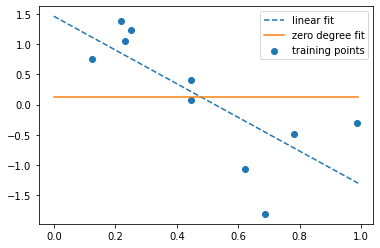

In [ ]:
#Order M=0

x_g= u[:, np.newaxis]
y = w[:, np.newaxis] 

ZeroDegree = PolynomialFeatures(degree = 0)
x_ZeroDegree = ZeroDegree.fit_transform(x_g)


l=lin.fit(x_g,y)
x_fit = np.arange(0,1,0.01)[:, np.newaxis]
y_lin_fit = lin.predict(x_fit)

# Fitting Polynomial Regression to the dataset
pr.fit(x_ZeroDegree, y)
y_zero_fit = pr.predict(ZeroDegree.fit_transform(x_fit))




# PLOTTING

plt.scatter(x_g, y, label='training points')
plt.plot(x_fit, y_lin_fit, label ='linear fit', linestyle='--')
plt.plot(x_fit, y_zero_fit,label='zero degree fit')
plt.legend(loc='upper right')
plt.show()

y_lin_pred = lin.predict(x_g)
y_zero_pred = pr.predict(x_ZeroDegree)

# FINDING MSE ERROR

E[1]=mean_squared_error(y, y_lin_pred)     #MSE for M=1
E[0]=mean_squared_error(y, y_zero_pred)     #MSE for M=0

In [ ]:
b1=lin.intercept_[0]
w11= lin.coef_.T

b0=pr.intercept_[0]

b1,w11,b0

(1.4649244104641095, array([[-2.79533437]]), 0.12595310751834304)

2) For M=3 (graph of polynomial function of degree 0 plotted with linear regression function for comparison) 

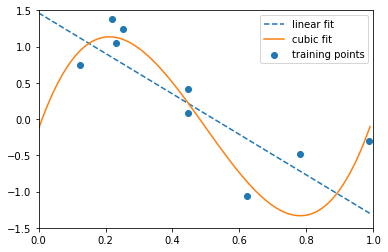

In [ ]:
#Order M=3
x_g= u[:, np.newaxis]
y = w[:, np.newaxis] 
cubic = PolynomialFeatures(degree = 3)
x_cubic = cubic.fit_transform(x_g)

lin.fit(x_g,y)
x_fit = np.arange(0,1,0.01)[:, np.newaxis]
y_lin_fit = lin.predict(x_fit)


# Fitting Polynomial Regression to the dataset
pr.fit(x_cubic, y)
y_cubic_fit = pr.predict(cubic.fit_transform(x_fit))

# PLOTTING 
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.scatter(x_g, y, label='training points')
plt.plot(x_fit, y_lin_fit, label ='linear fit', linestyle='--')
plt.plot(x_fit, y_cubic_fit,label='cubic fit')
plt.legend(loc='upper right')
plt.show()

y_cubic_pred = pr.predict(x_cubic)

# FINDING MSE ERROR 
E[2]=mean_squared_error(y, y_cubic_pred)   #MSE error for M=3

In [ ]:
b3=pr.intercept_
w31,w32,w33,w34= pr.coef_.T
b3,w31,w32,w33,w34

(array([-0.13560836]),
 array([0.]),
 array([13.20648078]),
 array([-39.6718627]),
 array([26.63033599]))

3) For M=6 (graph of polynomial function of degree 0 plotted with linear regression function for comparison) 

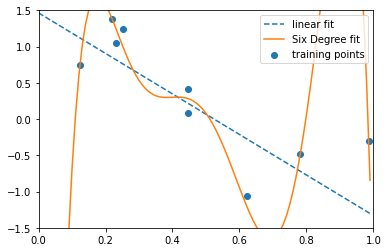

In [ ]:
#Order M=6
x_g= u[:, np.newaxis]
y = w[:, np.newaxis] 
Six_Degree = PolynomialFeatures(degree = 6)
x_SixDegree = Six_Degree.fit_transform(x_g)

lin.fit(x_g,y)
x_fit = np.arange(0,1,0.01)[:, np.newaxis]
y_lin_fit = lin.predict(x_fit)


# Fitting Polynomial Regression to the dataset
pr.fit(x_SixDegree, y)
y_SixDegree_fit = pr.predict(Six_Degree.fit_transform(x_fit))


#PLOTTING
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.scatter(x_g, y, label='training points')
plt.plot(x_fit, y_lin_fit, label ='linear fit', linestyle='--')
plt.plot(x_fit, y_SixDegree_fit,label='Six Degree fit')
plt.legend(loc='upper right')
plt.show()

y_SixDegree_pred = pr.predict(x_SixDegree)

#FINDING ERROR

E[3]=mean_squared_error(y, y_SixDegree_pred)  #MSE for M=6

In [ ]:
b6=pr.intercept_[0]
w61,w62,w63,w64,w65,w66,w67=pr.coef_.T

b6,w61,w62,w63,w64,w65,w66,w67

(-23.12357561693399,
 array([0.]),
 array([434.07640862]),
 array([-2876.17431588]),
 array([9206.87339198]),
 array([-15317.17824736]),
 array([12654.06810492]),
 array([-4081.03058115]))

4) For M=9 (graph of polynomial function of degree 0 plotted with linear regression function for comparison) 

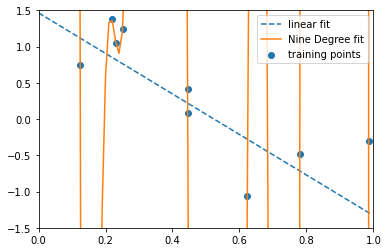

In [ ]:

#Order M=9
x_g= u[:, np.newaxis]
y = w[:, np.newaxis] 
Nine_Degree = PolynomialFeatures(degree = 9)
x_NineDegree = Nine_Degree.fit_transform(x_g)


lin.fit(x_g,y)
x_fit = np.arange(0,1,0.01)[:, np.newaxis]
y_lin_fit = lin.predict(x_fit)


# Fitting Polynomial Regression to the dataset

pr.fit(x_NineDegree, y)
y_NineDegree_fit = pr.predict(Nine_Degree.fit_transform(x_fit))


#PLOTTING 
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.scatter(x_g, y, label='training points')
plt.plot(x_fit, y_lin_fit, label ='linear fit', linestyle='--')
plt.plot(x_fit, y_NineDegree_fit,label='Nine Degree fit')
plt.legend(loc='upper right')
plt.show()

y_NineDegree_pred = pr.predict(x_NineDegree)

#FINDING ERROR

E[4]=mean_squared_error(y, y_NineDegree_pred)   #MSE for M=9

In [ ]:
b9=pr.intercept_[0]
w91,w92,w93,w94,w95,w96,w97,w98,w99,w9_10= pr.coef_.T

b9,w91,w92,w93,w94,w95,w96,w97,w98,w99,w9_10

(8086.340365376287,
 array([0.]),
 array([-234333.32894912]),
 array([2840869.58380853]),
 array([-18933706.23072428]),
 array([76495594.66978367]),
 array([-1.94494354e+08]),
 array([3.1192405e+08]),
 array([-3.05277553e+08]),
 array([1.66049756e+08]),
 array([-38381496.25361586]))

##PROBLEM 2: POLYNOMIAL CURVE FITTING
**(D) Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.**

In [ ]:
MSE=pd.DataFrame({'Degree':[0,1,3,6,9],'MSError':[e for e in E]})
MSE

,Degree,MSError
0,0,9.876730e-01
1,1,4.235626e-01
2,3,1.404725e-01
3,6,1.985202e-02
4,9,7.924610e-16


**Observations**

From the above observations, the Mean Square Error is definately reducing as the model complexity increases.

But, from the plots of above polynomial egression models it is clear that for Degree=0,1, the models is underfitting as it is not able to capture the data distribution.

And for Degree=6,9, the models are overfitting as they have become very sensitive to the training dataset and have lost the actual data distribution spread.

For Degree=3, can be said as best fit as it is capturing the data distribution and is not very close and sensitive to training dataset.

##Problem 2: POLYNOMIAL CURVE FITTING
**(E) For each model:  M={0,1,3,6,9} , report the coefficients  w∗ . Explain the trend in the coefficients with increasing model complexity.**

In [ ]:
coeff=pd.DataFrame()
coeff['Degree 0']=[b0,0,0,0,0,0,0,0,0,0,0]
coeff['Degree 1']=[b1,w11,0,0,0,0,0,0,0,0,0]
coeff['Degree 3']=[b3,w31,w32,w33,w34,0,0,0,0,0,0]
coeff['Degree 6']=[b6,w61,w62,w63,w64,w65,w66,w67,0,0,0]
coeff['Degree 9']=[b9,w91,w92,w93,w94,w95,w96,w97,w98,w99,w9_10]

coeff

,Degree 0,Degree 1,Degree 3,Degree 6,Degree 9
0,0.125953,1.46492,[-0.13560836386014785],-23.1236,8086.34
1,0.000000,[[-2.795334371195867]],[0.0],[0.0],[0.0]
2,0.000000,0,[13.206480783750624],[434.07640862166],[-234333.32894912487]
3,0.000000,0,[-39.67186270264012],[-2876.174315879831],[2840869.583808528]
4,0.000000,0,[26.63033598700408],[9206.873391983443],[-18933706.230724283]
5,0.000000,0,0,[-15317.178247364793],[76495594.66978367]
6,0.000000,0,0,[12654.06810491626],[-194494353.87004387]
7,0.000000,0,0,[-4081.0305811526823],[311924049.7782415]
8,0.000000,0,0,0,[-305277553.47439903]
9,0.000000,0,0,0,[166049756.26743186]


**Observations**


The as the model complexity is increasing the weight of coefficients as seen above have increased in magnitude as they are trying to capture all the training dataset, this increases variability.

The larger the term’s coefficient size, the larger the penalty, leading to predicted value being much far from actual result

##PROBLEM 2: POLYNOMIAL CURVE FITTING
**(F) The goal here is to achieve good generalization by making accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.**

In [ ]:
# validation dataset generation


import math 


E_validation=np.zeros(5)
r.seed(0)
X_test = np.linspace(0,1,100)
Y_test = np.sin(2*math.pi*X_test) + np.random.normal(0,0.5,100)
  

k=X_test
q=Y_test
  



##PROBLEM 2: POLYNOMIAL CURVE FITTING
**(G) Evaluate each model:  M={0,1,3,6,9}  on the validation set and report the mean squared error for each model.**

In [ ]:
lin= LinearRegression(fit_intercept=True)
pr=LinearRegression(fit_intercept=True)

x_test= k[:, np.newaxis]
y_test = q[:, np.newaxis]

x_0=ZeroDegree.fit_transform(x_test)
pr.fit(x_0, y_test)
y_0_pred=pr.predict(x_0)
E_validation[0]=mean_squared_error(y_test, y_0_pred)


lin.fit(x_test, y_test)
y_1_pred=pr.predict(x_test)
E_validation[1]=mean_squared_error(y_test, y_1_pred)



x_3=cubic.fit_transform(x_test)
pr.fit(x_3, y_test)
y_3_pred=pr.predict(x_3)
E_validation[2]=mean_squared_error(y_test, y_3_pred)


x_6=Six_Degree.fit_transform(x_test)
pr.fit(x_6, y_test)
y_6_pred=pr.predict(x_6)
E_validation[3]=mean_squared_error(y_test, y_6_pred)


x_9=Nine_Degree.fit_transform(x_test)
pr.fit(x_9, y_test)
y_9_pred=pr.predict(x_9)
E_validation[4]=mean_squared_error(y_test, y_9_pred)




In [ ]:
MSE_Test=pd.DataFrame({'Degree':[0,1,3,6,9],'MSError_TEST':[e for e in E_validation]})
MSE_Test['MSError_TRAIN']=[e for e in E]
MSE_Test

,Degree,MSError_TEST,MSError_TRAIN
0,0,0.706575,9.876730e-01
1,1,0.706575,4.235626e-01
2,3,0.251317,1.404725e-01
3,6,0.245645,1.985202e-02
4,9,0.238108,7.924610e-16


##PROBLEM 2: POLYNOMIAL CURVE FITTING
**(H) Plot the training and validation set mean squared errors for models with  M={0,1,3,6,9}  on the same graph.** 

**Explain the trend in the error values with increasing model complexity.**

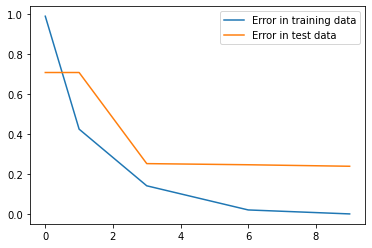

In [ ]:
X=[0,1,3,6,9]
plt.plot(X, [e for e in E], label="Error in training data")#, alpha=1, color='red')
plt.plot(X, [e for e in E_validation], label='Error in test data')#,alpha=0.5)
plt.legend(loc='upper right')
plt.show()

**Observations**

As seen in above plot, as the model complexity increases, the training error decreases rapidly, but the test errors relative to train errors increases (as we see overlap area is decreasing as Degree increasing.

The train error being more than test error for Degree aero shows that the there is some problem in this fit, which as we discussed is it is UNDERFITTING

The training error reduces with increase in degree and is found lesses than corresponding test error, we can see for DEGREE=3, the training and test error have least gap, this shows M=3 is optimal fit for this case, from M=6 as degree increases, OVERFITTING starts to occur

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

##PROBLEM 2: REGULARIZATION
**(A)Fit a polynomial regression model of order  M=9  to the same training dataset as before but now using the regularized error function**

**Done using Ridge Regression from Sklearn library**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


alpha=[0.01, 0.1, 1]
E_L2=np.zeros(3)
x_l2= k[:, np.newaxis]
y_l2=q[:, np.newaxis]
coefs = []

x_g= u[:, np.newaxis]
y = w[:, np.newaxis] 
Nine_Degree = PolynomialFeatures(degree = 9)
x_NineDegree = Nine_Degree.fit_transform(x_g)



x_l2_9D = Nine_Degree.fit_transform(x_g.reshape(-1,1))
x_l22 = Nine_Degree.fit_transform(x_l2.reshape(-1,1))
i=0



for j in alpha:

  ridgeModel = RidgeCV(alphas=[j]).fit(x_l2_9D,y)
  #ridgeModel
  coefs.append(ridgeModel.coef_)
  y_pred= ridgeModel.predict(x_l22)
  E_L2[i]=mean_squared_error(y_l2, y_pred)
  i+=1
 

##PROBLEM 2: REGURIZATION
**(B) Report the coefficients of the model fit above for  λ=0.01,0.1,1 . Explain the trend in the coefficient values with increasing  λ .**

In [ ]:
alphadata=  pd.DataFrame(np.concatenate(coefs))
alphadata.index=['Alpha=0.01','Alpha=0.1','Alpha=1']
alphadata.columns=['x_0','x_1','x_2','x_3','x_4','x_5','x_6','x_7','x_8','x_9']
alphadata

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
Alpha=0.01,0.0,-1.773609,-3.054918,-1.311101,0.385553,1.253108,1.396468,1.078816,0.521277,-0.126551
Alpha=0.1,0.0,-2.005986,-1.637441,-0.816085,-0.149687,0.286185,0.541312,0.675136,0.733117,0.746092
Alpha=1,0.0,-0.840921,-0.670599,-0.393116,-0.171485,-0.016097,0.088473,0.157627,0.202801,0.231878


**Observations**

As we increase alpha, the weights of coefficients are observed to decrease, which shows the data is becoming less sensitive to the training dataset

## PROBLEM 2: REGULARIZATION

**(C) Find the optimal value of the hyperparameter  λ .**


**(D) Compare the validation error results of the following two models : polynomial regression model of order  M=9  without regularization and polynomial regression model of order  M=9  with regularization hyperparameter as estimated above.**

In [ ]:
# Find the optimal value of the hyperparameter  λ

errorVS=pd.DataFrame()

errorVS['Alpha value']=[0.01,0.1,1]
errorVS['Error Without Regularization']=[E_validation[4], E_validation[4], E_validation[4]]
errorVS['Error With Regularization']=[e for e in E_L2]

errorVS

,Alpha value,Error Without Regularization,Error With Regularization
0,0.01,0.238108,0.533872
1,0.10,0.238108,0.471584
2,1.00,0.238108,0.420655


**Observation**

The *optimal value* of alpha from above three cases is alpha=0.01, as it gives minimum Mean Square Error.

*COMPARING VALIDATION ERROR RESULTS FOR with and without regularisation:*

The Validation error without regularisation is coming lesser than with regularisation.

The Validation error with regularisation increases as alpha increases from 0.01 to 0.1, this means with L2 regularisation taking alpha=0.01, we are getting  model closer to actual results

### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

## PROBLEM 2: BIAS- VARIANCE TRADE OFF

**(A) Generate  50  datasets, each containing  10  points, independently, from the curve  f(x)=sin(2πx) . Add gaussian noise  N(0,0.5)  to each data point.**

**(B) Fit a polynomial regression model of order  M=9  to each training dataset by minimizing the regularized error function  E′(w)  with  λ=1 .**

**(C) Plot the following:**


> **Function obtained by training the model on each of the  50 datasets in the same figure.**
 
>  **The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.**










ALL PARTS SOLVED TOGETHER FOR DIFFERENT ALPHAS

**FOR ALPHA=1**

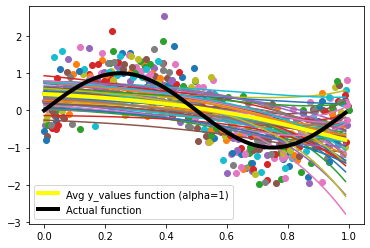

In [ ]:
import random as r
import numpy as np
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


# GENERATING 50 SETS OF TRAINING DATA EACH CONTAINING 10 POINTS


r.seed(0)
x_training= np.zeros((50,10))
y_training= np.zeros((50,10))
y_v=[]

for k in range(0,50):
  for p in range(0,10):
    x=r.uniform(0,1)
    x_training[k][p]=x
    b=2*math.pi*x
    y_training[k][p]= math.sin(b)+r.normalvariate(0,0.5)


#Fit a polynomial regression model of order  M=9  to each training dataset with  λ=1 .

tx=x_training
ty=y_training
x_f = np.arange(0,1,0.01)

for g in range(0,50):
  x_f = np.arange(0,1,0.01)
  x_ff = np.arange(0,1,0.01)[:, np.newaxis]
  x_d= tx[:][g][:, np.newaxis]
  y_d=ty[:][g]
  model = make_pipeline(PolynomialFeatures(9), Ridge(1))
  model.fit(x_d, y_d)
  y_v.append(model.predict(x_ff))
  y_vv=np.array(y_v)
  y_avg=np.sum(y_v, axis=0)/50
               
  plt.scatter(x_training[:][g],y_training[:][g])

  #Plot of function obtained by training the model on each of the 50 datasets in the same figure

  plt.plot(x_f, model.predict(x_ff)) 

si=[]
p=0


for j in range(0,100,1):
  f=math.sin(2*math.pi*p)
  si.append(f)
  p+=0.01

# Plot corresponding average of the 50 fits
plt.plot(x_f,y_avg, linewidth=4 ,color='yellow', label='Avg y_values function (alpha=1)') 

# sinusoidal function from which the datasets were generated
plt.plot(x_f,si, linewidth=4, color='black', label='Actual function')     

plt.legend()
    

**FOR ALPHA= 0.1**

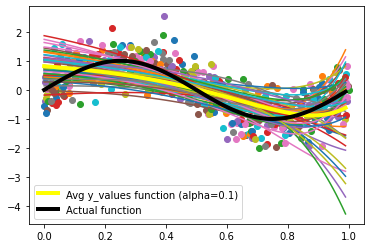

In [ ]:
import random as r
import numpy as np
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


# GENERATING 50 SETS OF TRAINING DATA EACH CONTAINING 10 POINTS


r.seed(0)
x_training= np.zeros((50,10))
y_training= np.zeros((50,10))
y_v=[]

for k in range(0,50):
  for p in range(0,10):
    x=r.uniform(0,1)
    x_training[k][p]=x
    b=2*math.pi*x
    y_training[k][p]= math.sin(b)+r.normalvariate(0,0.5)


#Fit a polynomial regression model of order  M=9  to each training dataset with λ=0.1 .

tx=x_training
ty=y_training
x_f = np.arange(0,1,0.01)

for g in range(0,50):
  x_f = np.arange(0,1,0.01)
  x_ff = np.arange(0,1,0.01)[:, np.newaxis]
  x_d= tx[:][g][:, np.newaxis]
  y_d=ty[:][g]
  model = make_pipeline(PolynomialFeatures(9), Ridge(0.1))
  model.fit(x_d, y_d)
  y_v.append(model.predict(x_ff))
  y_vv=np.array(y_v)
  y_avg=np.sum(y_v, axis=0)/50
               
  plt.scatter(x_training[:][g],y_training[:][g])

   # Plot of function obtained by training the model on each of the 50 datasets in the same figure.

  plt.plot(x_f, model.predict(x_ff))  
si=[]
p=0


for j in range(0,100,1):
  f=math.sin(2*math.pi*p)
  si.append(f)
  p+=0.01

# Plot corresponding average of the 50 fits
plt.plot(x_f,y_avg, linewidth=4 ,color='yellow', label='Avg y_values function (alpha=0.1)')  

# sinusoidal function from which the datasets were generated
plt.plot(x_f,si, linewidth=4, color='black', label='Actual function')      
plt.legend()

    

**FOR ALPHA= 10**

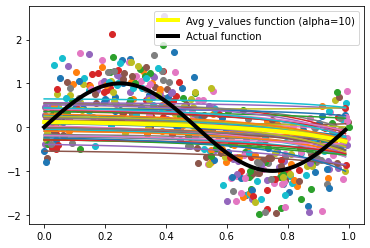

In [ ]:
import random as r
import numpy as np
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


# GENERATING 50 SETS OF TRAINING DATA EACH CONTAINING 10 POINTS


r.seed(0)
x_training= np.zeros((50,10))
y_training= np.zeros((50,10))
y_v=[]

for k in range(0,50):
  for p in range(0,10):
    x=r.uniform(0,1)
    x_training[k][p]=x
    b=2*math.pi*x
    y_training[k][p]= math.sin(b)+r.normalvariate(0,0.5)


#Fit a polynomial regression model of order  M=9  to each training dataset  λ=10 .

tx=x_training
ty=y_training
x_f = np.arange(0,1,0.01)

for g in range(0,50):
  x_f = np.arange(0,1,0.01)
  x_ff = np.arange(0,1,0.01)[:, np.newaxis]
  x_d= tx[:][g][:, np.newaxis]
  y_d=ty[:][g]
  model = make_pipeline(PolynomialFeatures(9), Ridge(10))
  model.fit(x_d, y_d)
  y_v.append(model.predict(x_ff))
  y_vv=np.array(y_v)
  y_avg=np.sum(y_v, axis=0)/50
               
  plt.scatter(x_training[:][g],y_training[:][g])

  # Plot of function obtained by training the model on each of the 50 datasets in the same figure.

  plt.plot(x_f, model.predict(x_ff))   
si=[]
p=0


for j in range(0,100,1):
  f=math.sin(2*math.pi*p)
  si.append(f)
  p+=0.01

# Plot corresponding average of the 50 fits
plt.plot(x_f,y_avg, linewidth=4 ,color='yellow', label='Avg y_values function (alpha=10)')


 # sinusoidal function from which the datasets were generated
plt.plot(x_f,si, linewidth=4, color='black', label='Actual function')     
plt.legend()

    

##PROBLEM 2: BIAS-VARIANCE TRADE OFF

**(D)Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.**

As we can see from the plots above that as the value of alpha increases, the model complexity reduces.

*Variance in data is the variability of the model in a case where different Training Data is used*, we see as alpha increases (i.e. model complexity decreases), variability of functions plotted decreases.

*Bias is introduce to simply the model*, as alpha increases, bias is increasing and we see the model tends towards becoming an UNDERFIT model.




#Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


Please load the data_prob3_parta.csv file here


---



---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_prob3_parta.csv to data_prob3_parta.csv


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

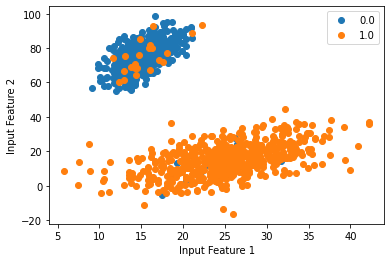

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob3_parta.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)


sc1=pd.DataFrame(x_train['Input feature 1'])
sc1['Input feature 2']=x_train['Input feature 2']
sc1['Output label']=y_train
groups=sc1.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()

Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [ ]:
b=logisticRegr.intercept_[0]
w1,w2= logisticRegr.coef_.T
c=-b/w2
m= -w1/w2
print('Weights are as follows=',w1,w2)

Weights are as follows= [0.1637087] [-0.08897599]


Print the final accuracy on test data.

In [ ]:
y_pred=logisticRegr.predict(x_test)

from sklearn.metrics import accuracy_score
A=accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression for this data set is=',A)

Accuracy of logistic regression for this data set is= 0.9706666666666667


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

Text(0, 0.5, 'Input Feature 2')

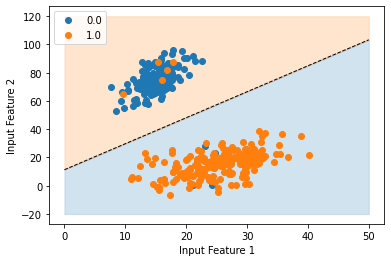

In [ ]:
sc2=pd.DataFrame(x_test['Input feature 1'])
sc2['Input feature 2']=x_test['Input feature 2']
sc2['Output label']=y_test
groups=sc2.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)
plt.legend()

xmin, xmax = 0, 50
ymin, ymax = -20, 120
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


Please load the data_prob3_partb.csv file here

---



---



In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving data_prob3_partb.csv to data_prob3_partb.csv


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

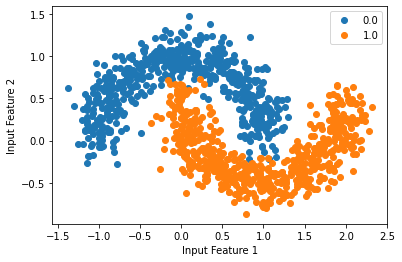

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob3_partb.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

sc1=pd.DataFrame(x_train['Input feature 1'])
sc1['Input feature 2']=x_train['Input feature 2']
sc1['Output label']=y_train
groups=sc1.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()


from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

Print the final weights.

In [ ]:
b=logisticRegr.intercept_[0]
w1,w2= logisticRegr.coef_.T
c=-b/w2
m= -w1/w2
print('Weights are as follows=',w1,w2)

Weights are as follows= [1.15044276] [-4.52806285]


Print the final accuracy on test data.

In [ ]:
y_pred=logisticRegr.predict(x_test)

A=accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression for this data set is=',A)

Accuracy of logistic regression for this data set is= 0.8906666666666667


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

Text(0, 0.5, 'Input Feature 2')

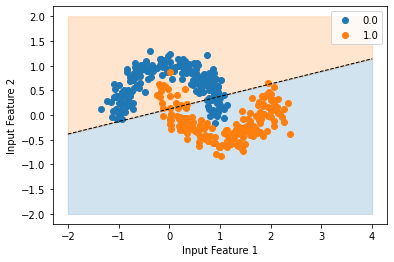

In [ ]:
sc2=pd.DataFrame(x_test['Input feature 1'])
sc2['Input feature 2']=x_test['Input feature 2']
sc2['Output label']=y_test
groups=sc2.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)
plt.legend()

xmin, xmax = -2, 4
ymin, ymax = -2, 2
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


Please load the data_prob3_partb.csv here

---



---



In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving data_prob3_partb.csv to data_prob3_partb.csv


Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
c=np.zeros(8)
m=np.zeros(8)
AccValues= np.zeros(8)
acc=0
df = pd.read_csv('data_prob3_partb.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']

for t in range(3,11):
  df = pd.read_csv('data_prob3_partb.csv')
  x=df[['Input feature 1','Input feature 2']]
  y=df['Output label']
  fv=3

  for i in range(2,t+1):
    f='Input feature '+str(fv)
    v=np.power(x['Input feature 1'],i)
    x[f]=v
    f2='Input feature'+str(fv+1)
    v2=np.power(x['Input feature 2'],i)
    x[f2]=v2
    fv=fv+2

  x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

  from sklearn.linear_model import LogisticRegression
  logisticRegr = LogisticRegression()
  logisticRegr.fit(x_train, y_train)

  y_pred=logisticRegr.predict(x_test)
  from sklearn.metrics import accuracy_score
  AccValues[acc]= accuracy_score(y_test, y_pred)


  acc=acc+1

DegreeAcc=pd.DataFrame({'T_Values':[3,4,5,6,7,8,9,10],'Accuracy':[e for e in AccValues]})


Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [ ]:
DegreeAcc

,T_Values,Accuracy
0,3,0.973333
1,4,0.978667
2,5,0.981333
3,6,0.984000
4,7,0.984000
5,8,0.984000
6,9,0.984000
7,10,0.984000


Print the final weights. 

**As after T=6, there is not change in the accuracy, thus printing weight and accuracy for T=6**

In [ ]:
df = pd.read_csv('data_prob3_partb.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']

for i in range(2,7):
    f='Input feature '+str(fv)
    v=np.power(x['Input feature 1'],i)
    x[f]=v
    f2='Input feature'+str(fv+1)
    v2=np.power(x['Input feature 2'],i)
    x[f2]=v2
    fv=fv+2

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

y_pred=logisticRegr.predict(x_test)
from sklearn.metrics import accuracy_score
AccValue= accuracy_score(y_test, y_pred)


In [ ]:
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12= logisticRegr.coef_.T
b=logisticRegr.intercept_
print("the weights for T=6 function are",w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12)

the weights for T=6 function are [0.12162462] [-5.6150112] [-5.98269093] [0.69503578] [0.1830007] [-1.92714706] [-2.16904285] [-0.6428659] [1.80848812] [-1.20737028] [1.19758529] [-0.80059562]


Print the final accuracy on transformed test data.

In [ ]:
print("The highest accuracy obtained is=",AccValue)

The highest accuracy obtained is= 0.984


Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

Text(0, 0.5, 'Input Feature 2')

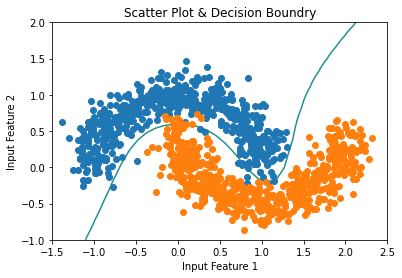

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# CONTOUR PLOT FOR DECISION BOUNDARY
x=np.linspace(-1.5,2.5,40)
y=np.linspace(-1,2,40)
x,y=np.meshgrid(x,y)
z= b+ w1*x + w2*y + w3*(x**2) + w4*(y**2) +w5*(x**3) + w6*(y**3) + w7*(x**4)+ w8*(y**4) +w9*(x**5) + w10*(y**5)+w11*(x**6)+w12*(y**6)
plt.contour(x,y,z,0)
plt.title('Scatter Plot & Decision Boundry')



df = pd.read_csv('data_prob3_partb.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

sc1=pd.DataFrame(x_train['Input feature 1'])
sc1['Input feature 2']=x_train['Input feature 2']
sc1['Output label']=y_train
groups=sc1.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')






## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_prob3_partd.csv to data_prob3_partd.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob3_partd.csv')
x=df[['Input feature 1','Input feature 2']]
y=df['Output label']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_test

,Input feature 1,Input feature 2
471,12.5,68.40
9,40.6,50.90
1499,24.3,19.90
54,26.0,24.70
1411,39.5,46.00
...,...,...
75,45.8,50.60
481,14.8,66.90
1350,35.7,56.10
748,41.1,46.70


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

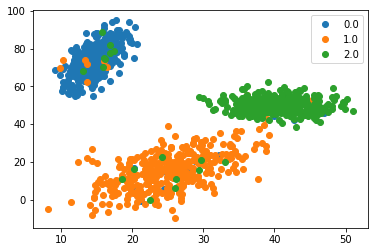

In [ ]:
sc1=pd.DataFrame(x_train['Input feature 1'])
sc1['Input feature 2']=x_train['Input feature 2']
sc1['Output label']=y_train
groups=sc1.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)
plt.legend()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [ ]:
b=model.intercept_
w1,w2= model.coef_.T




Print the final accuracy on test data.

In [ ]:
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.952

Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

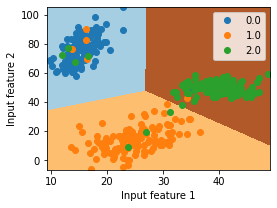

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = x_test['Input feature 1'].min() - .5, x_test['Input feature 1'].max() + .5

y_min, y_max = x_test['Input feature 2'].min() - .5, x_test['Input feature 2'].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


sc2=pd.DataFrame(x_test['Input feature 1'])
sc2['Input feature 2']=x_test['Input feature 2']
sc2['Output label']=y_test
groups=sc2.groupby('Output label')
for name, group in groups:
    plt.plot(group["Input feature 1"], group["Input feature 2"], marker="o", linestyle="", label=name)

plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')

plt.legend()
# Plot also the training points
#plt.scatter(x_test['Input feature 1'], x_test['Input feature 2'], c=y_test, edgecolors='k', cmap=plt.cm.Paired)


# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

Please load the Cric_data.csv file here

---



---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cric_data.csv to Cric_data.csv


In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [ ]:
# Extract data and partition

import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class','Player Role'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

#MAKING LINEAR PREDICTOR FROM SCRATCH

In [ ]:
# FUNCTION TO RETURN PREDICTED VALUE

def Lin_clsf_1a(X_train, Y_train, X_test):
  import math
  import numpy as np
  mean=X_train.groupby(by=Y_train).mean()
  m=np.array(mean)
  var=1
  mean_var=[]
  yprediction=[]
  p=[]
  for i in range(len(m)):
    m_row=m[i]
    for index,value in enumerate(m_row):
      mean=value
      mean_var.append([mean,1])

    #splitting our list into diff classes
  mean_var2=np.array(mean_var)

  n_class=len(np.unique(Y_train)) 
  s=np.array_split(mean_var2,n_class) #bowler and batting


  Xtest=np.array(X_test)

  for k in range(len(Xtest)):
    v=Xtest[k]
    
    
    yprediction.append(pred(s,n_class,v,Y_train))
    
    
  return yprediction

In [ ]:
# FUNCTION TO CALC PROBABILITY

def gnl(x_val, x_mean,x_var):
  import math
  mean=x_mean
  variance=x_var
  e=np.e
  pi=np.pi
  eq_1=1/(np.sqrt(2*pi*variance))
  deno=2*variance
  num=(x_val-x_mean)**2
  expo=np.exp(-(num/deno))
  prob=eq_1*expo
  return prob

In [ ]:
#FUNCTION TO CALCULATE PREDICTED VALUE FOR EACH SAMPLE

def pred(s,n_class,sample,Y_train):
  prob=[]
  for i in range(n_class):
    class_one=s[i]
    for j in range(len(class_one)):
      class_one_x_mean=class_one[j][0]
      class_one_x_var=class_one[j][1]
      x_sample=sample[j]
      prob.append([gnl(x_sample,class_one_x_mean,class_one_x_var)])
    
    p=np.array(prob)
    prob_s=np.array_split(p,n_class)

    prior=1/(n_class)
    final_prob=[]

  for i in prob_s:
    class_prob=np.prod(i)*prior
    final_prob.append(class_prob)
    
  maxi_prob=max(final_prob)
  prob_index=final_prob.index(maxi_prob)
  
  classes=np.unique(Y_train)
  prediction=classes[prob_index]
  
  return prediction

In [ ]:
#BAYES CLASSIFIER FOUND BY USING GassianNB

def Bayes_clsf_1b(X_train, Y_train, X_test):
  #Import Gaussian Naive Bayes model
  from sklearn.naive_bayes import GaussianNB
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(X_train, Y_train)
  #Predict the response for test dataset
  y_test_pred = gnb.predict(X_test)
  return y_test_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class','Player Role'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']




inp=inp[inp.Player_Role!='Allrounder']
inp=inp.drop('Player_Role',axis=1)
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

y_predL= Lin_clsf_1a(x_train,y_train,x_test)

y_predB= Bayes_clsf_1b(x_train,y_train,x_test)


In [ ]:
newd=pd.DataFrame()
newd['linear predictor']=y_predL
newd['Bayesian predictor']=y_predB
newd['Actual Player Role']= y_test.values
newd

,linear predictor,Bayesian predictor,Actual Player Role
0,1,-1,1
1,1,-1,1
2,-1,-1,-1
3,1,1,1
4,1,1,1
...,...,...,...
204,1,1,1
205,-1,-1,-1
206,1,1,1
207,1,1,1


In [ ]:
AccL=0
AccB=0
d=np.array(newd['linear predictor'])

for i in range(len(d)):
  if newd['linear predictor'][i]==newd['Actual Player Role'][i]:
    AccL=AccL+1
  if newd['Bayesian predictor'][i]==newd['Actual Player Role'][i]:
    AccB+=1

AccLinear=AccL/len(newd['linear predictor'])
AccBayes=AccB/len(newd['linear predictor'])

In [ ]:
AccLinear, AccBayes

(0.84688995215311, 0.9090909090909091)

**CODE FOR PLOTTING** 

**1a)Linear Predictor** 

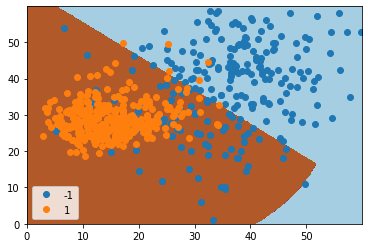

In [ ]:
# Assigning values to variables

import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class','Player Role'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']

inp=inp[inp.Player_Role!='Allrounder']
inp=inp.drop('Player_Role',axis=1)
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

y_predL=Lin_clsf_1a(x_train,y_train,x_test)

y_predB= Bayes_clsf_1b(x_train,y_train,x_test)



# Write the code for plotting here. 

import numpy as np
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define bounds of the domain
min1, max1 = 0,60
min2, max2 = 0,60

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = Lin_clsf_1a(x_train,y_train,grid)
yhat=np.array(yhat)


# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')

import matplotlib.pyplot as plt
x=[]
y=[]
x_train=x_train.values
y_train=y_train.values
for i in range(len(x_train)):
  if (x_train[i][0])<=60 and (x_train[i][1])<=60:
    x.append([x_train[i][0],x_train[i][1]])
    y.append(y_train[i])
m=pd.DataFrame(x)
m.columns=["Batting_Average","Bowling_Average"]
m["Player_Role"]=y

groups=m.groupby('Player_Role')
for name, group in groups:
    pyplot.plot(group["Batting_Average"], group["Bowling_Average"], marker="o", linestyle="", label=name)
pyplot.legend()



pyplot.show()

**CODE FOR PLOTTING** 

**1b)Bayes Classifier** 

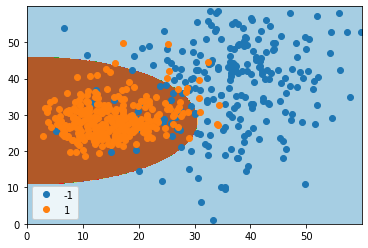

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class','Player Role'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)



inp=inp[inp.Player_Role!='Allrounder']
inp=inp.drop('Player_Role',axis=1)
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

y_predL=Lin_clsf_1a(x_train,y_train,x_test)

y_predB= Bayes_clsf_1b(x_train,y_train,x_test)


# Write the code for plotting here. 
import numpy as np
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define bounds of the domain
min1, max1 = 0,60
min2, max2 = 0,60

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = Bayes_clsf_1b(x_train,y_train,grid)
yhat=np.array(yhat)


# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')


import matplotlib.pyplot as plt
x=[]
y=[]
x_train=x_train.values
y_train=y_train.values
for i in range(len(x_train)):
  if (x_train[i][0])<=60 and (x_train[i][1])<=60:
    x.append([x_train[i][0],x_train[i][1]])
    y.append(y_train[i])
m=pd.DataFrame(x)
m.columns=["Batting_Average","Bowling_Average"]
m["Player_Role"]=y

groups=m.groupby('Player_Role')
for name, group in groups:
    pyplot.plot(group["Batting_Average"], group["Bowling_Average"], marker="o", linestyle="", label=name)
pyplot.legend()



pyplot.show()

**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

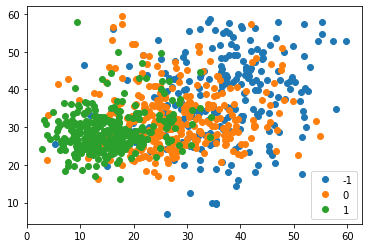

In [ ]:
# PLOTTING DISTRIBUTION OF DATA POINTS ACCORDING TO LABEL

import matplotlib.pyplot as plt
x=[]
y=[]
x_train=x_train.values
y_train=y_train.values
for i in range(len(x_train)):
  if (x_train[i][0])<=60 and (x_train[i][1])<=60:
    x.append([x_train[i][0],x_train[i][1]])
    y.append(y_train[i])
m=pd.DataFrame(x)
m.columns=["Batting_Average","Bowling_Average"]
m["Player_Role"]=y

groups=m.groupby('Player_Role')
for name, group in groups:
    pyplot.plot(group["Batting_Average"], group["Bowling_Average"], marker="o", linestyle="", label=name)
pyplot.legend()
  

In [ ]:
def Lin_clsf_2a(X_train, Y_train, X_test):
  import math
  import numpy as np
  mean=X_train.groupby(by=Y_train).mean()
  m=np.array(mean)
  var=1
  mean_var=[]
  yprediction=[]
  p=[]
  for i in range(len(m)):
    m_row=m[i]
    for index,value in enumerate(m_row):
      mean=value
      mean_var.append([mean,1])

    #splitting our list into diff classes
  mean_var2=np.array(mean_var)

  n_class=len(np.unique(Y_train)) 
  s=np.array_split(mean_var2,n_class) #bowler and batting


  Xtest=np.array(X_test)

  for k in range(len(Xtest)):
    v=Xtest[k]
    yprediction.append(loss(s,n_class,v,Y_train))

  return yprediction

    

In [ ]:
def loss(s,n_class,sample,Y_train):
  import numpy as np
  L= np.asmatrix([[0,1 ,2],[1, 0 ,1],[2, 1 ,0]])

  prob=[]
  for i in range(n_class):
    class_one=s[i]
    for j in range(len(class_one)):
      class_one_x_mean=class_one[j][0]
      class_one_x_var=class_one[j][1]
      x_sample=sample[j]
      prob.append([gnl(x_sample,class_one_x_mean,class_one_x_var)])
    
    p=np.array(prob)
    prob_s=np.array_split(p,n_class)

    prior=1/(n_class)
    final_prob=[]

  for i in prob_s:
    class_prob=np.prod(i)*prior
    final_prob.append(class_prob)
  
  final_probMatrix= np.asmatrix(final_prob)

  A=final_probMatrix
  B=L
  result=[[0,0,0]]
  result = np.dot(A,B)

  r=np.array(result)
  min_loss=min(min(r))
  
  for k in range(0,3):
    if r[0][k]==min_loss:
      prob_index=k

  
  classes=np.unique(Y_train)
  prediction=classes[prob_index]
  
  return prediction


In [ ]:
def gnl(x_val, x_mean,x_var):
  import numpy as np
  import math
  mean=x_mean
  variance=x_var
  e=np.e
  pi=np.pi
  eq_1=1/(np.sqrt(2*pi*variance))
  deno=2*variance
  num=(x_val-x_mean)**2
  expo=np.exp(-(num/deno))
  prob=eq_1*expo
  return prob

In [ ]:
def Bayes_clsf_2b(X_train, Y_train, X_test):
  #Import Gaussian Naive Bayes model
  from sklearn.naive_bayes import GaussianNB
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(X_train, Y_train)
  #Predict the response for test dataset
  y_test_pred = gnb.predict(X_test)
  return y_test_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
y_predL2=Lin_clsf_2a(x_train,y_train,x_test)
y_predB2= Bayes_clsf_2b(x_train,y_train,x_test)



In [ ]:
newd2=pd.DataFrame()
newd2['linear predictor with loss function']=y_predL2
newd2['Bayesian predictor with loss function']=y_predB2
newd2['Actual Player Role']= np.array(y_test)
newd2

,linear predictor with loss function,Bayesian predictor with loss function,Actual Player Role
0,1,1,1
1,1,1,1
2,-1,-1,0
3,0,1,0
4,1,1,0
...,...,...,...
313,1,1,0
314,1,0,-1
315,0,-1,-1
316,1,1,0


In [ ]:
AccL=0
AccB=0
d=np.array(newd2['linear predictor with loss function'])

for i in range(len(d)):
  if newd2['linear predictor with loss function'][i]==newd2['Actual Player Role'][i]:
    AccL=AccL+1
  if newd2['Bayesian predictor with loss function'][i]==newd2['Actual Player Role'][i]:
    AccB+=1

AccLinear1=AccL/len(newd2['linear predictor with loss function'])
AccBayes1=AccB/len(newd2['linear predictor with loss function'])

In [ ]:
AccLinear1,AccBayes1

(0.6226415094339622, 0.6415094339622641)

**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

**CODE FOR PLOTTING** 

**2a)Linear Predictor with Loss Function** 

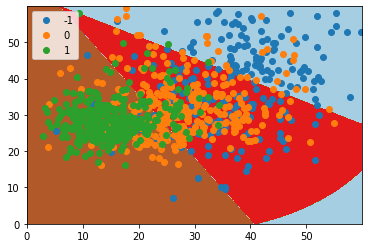

In [ ]:
# Write the code for plotting here. 
import numpy as np
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define bounds of the domain
min1, max1 = 0,60
min2, max2 = 0,60

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = Lin_clsf_2a(x_train,y_train,grid)
yhat=np.array(yhat)


# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')


import matplotlib.pyplot as plt
x=[]
y=[]
x_train=x_train.values
y_train=y_train.values
for i in range(len(x_train)):
  if (x_train[i][0])<=60 and (x_train[i][1])<=60:
    x.append([x_train[i][0],x_train[i][1]])
    y.append(y_train[i])
m=pd.DataFrame(x)
m.columns=["Batting_Average","Bowling_Average"]
m["Player_Role"]=y

groups=m.groupby('Player_Role')
for name, group in groups:
    pyplot.plot(group["Batting_Average"], group["Bowling_Average"], marker="o", linestyle="", label=name)
pyplot.legend()



pyplot.show()


**CODE FOR PLOTTING** 

**2b) Bayes Classifier with Loss Function** 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
inp = pd.read_csv('Cric_data.csv', usecols=["Batting Average",'Bowling Average','Player Class'])#.values
inp. columns = inp. columns. str. replace(' ','_')
x=inp[['Batting_Average', 'Bowling_Average']]
y=inp['Player_Class']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
y_predL2=Lin_clsf_2a(x_train,y_train,x_test)
y_predB2= Bayes_clsf_2b(x_train,y_train,x_test)


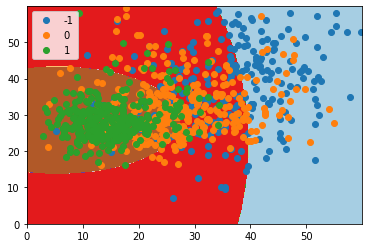

In [ ]:
# Write the code for plotting here. 
import numpy as np
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define bounds of the domain
min1, max1 = 0,60
min2, max2 = 0,60

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = Bayes_clsf_2b(x_train,y_train,grid)
yhat=np.array(yhat)


# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')

import matplotlib.pyplot as plt
x=[]
y=[]
x_train=x_train.values
y_train=y_train.values
for i in range(len(x_train)):
  if (x_train[i][0])<=60 and (x_train[i][1])<=60:
    x.append([x_train[i][0],x_train[i][1]])
    y.append(y_train[i])
m=pd.DataFrame(x)
m.columns=["Batting_Average","Bowling_Average"]
m["Player_Role"]=y

groups=m.groupby('Player_Role')
for name, group in groups:
    pyplot.plot(group["Batting_Average"], group["Bowling_Average"], marker="o", linestyle="", label=name)
pyplot.legend()



pyplot.show()


**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.


## We have 4 classifier:

> Linear predictor in part 1a 

> Bayes Predictor in part 1b

> Linear predictor taking loss function in part 2a

> Bayes Predictor taking loss function in part 2b









In [ ]:
ClassifierAcc=pd.DataFrame()

ClassifierAcc['Linear Predictor Accuracy']=[AccLinear,AccLinear1]
ClassifierAcc['Bayes Classifier Accuracy']=[AccBayes,AccBayes1]
ClassifierAcc.index=['Binary','MultiClass With Loss Function']

ClassifierAcc

,Linear Predictor Accuracy,Bayes Classifier Accuracy
Binary,0.846890,0.909091
MultiClass With Loss Function,0.622642,0.641509


Linear Classifier 1(a) : It Seperates the Batsmen and Bowlers by a line segment.Decision Boundary is a line in this case as there are only 2 class: -1 & +1.


Linear Classifier 2(a) : It Seperates the Batsmen, Bowlers and All rounders by two line segment.Decision Boundaries are two line segment in this case as there are 3 class: 0, -1 & +1.



NB Classifier 1(b) : It Seperates the Batsmen and Bowlers by a non-linear curve. Decision Boundary is non-linear in this case.


NB Classifier 2(b) : It Seperates the Batsmen, Bowlers and All rounders by two non linear curves.Decision Boundaries are two non linear curves in this case.